# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import gym
import random
import os
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="/Users/hiroaki-hamada/Documents/Udacity/Project3/Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
#for i in range(1, 6):                                      # play game for 5 episodes
#    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#    states = env_info.vector_observations                  # get the current state (for each agent)
#    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#    while True:
#        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#        next_states = env_info.vector_observations         # get next state (for each agent)
#        rewards = env_info.rewards                         # get reward (for each agent)
#        dones = env_info.local_done                        # see if episode finished
#        scores += env_info.rewards                         # update the score (for each agent)
#        states = next_states                               # roll over states to next time step
#        if np.any(dones):                                  # exit loop if episode finished
#            break
#    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
def ddpg(print_every=10, max_t=10000, learn_every=20, num_learn=10):
    n_episodes = 1000
    scores = []
    scores_window = deque(maxlen=100)
    scores_maximum = deque(maxlen=100)

    for episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]            # reset the environment
        agent.reset() 
        states = env_info.vector_observations
        score = np.zeros(n_agents)
        
        for t in range(max_t):
            actions = agent.act(states)
        
            env_info = env.step( actions )[brain_name]               # send the action to the environment                            
            next_states = env_info.vector_observations               # get the next state        
            rewards = env_info.rewards                               # get the reward        
            dones = env_info.local_done                              # see if episode has finished        

            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done) # send actions to the agent

            score += env_info.rewards                                         # update the score
        
            states = next_states                                     # roll over the state to next time step        
                                                      
            if t%learn_every == 0:
                for _ in range(num_learn):
                    agent.start_learn()
                    
            if np.any( dones ):                                          # exit loop if episode finished        
                break                                        

        scores.append(np.max(score))
        scores_window.append(score)
        scores_maximum.append(np.max(score))

        print('\rEpisode {} \t Score: {:.2f} \tSimple average Score: {:.2f}, \tAverage maximum Score: {:.2f}'.format(episode, np.max(score), np.mean( scores_window), np.mean( scores_maximum)), end="")
        
        if episode % print_every == 0:
            print('\rEpisode {} \t Score: {:.2f} \tSimple average Score: {:.2f}, \tAverage maximum Score: {:.2f}'.format(episode, np.max(score), np.mean( scores_window), np.mean( scores_maximum)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if np.mean(scores_maximum)>= 0.5 and episode >= 100:
            print('\rEpisode {} \t Score: {:.2f} \tSimple average Score: {:.2f}, \tAverage maximum Score: {:.2f}'.format(episode, np.max(score), np.mean( scores_window), np.mean( scores_maximum)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    
    return scores


In [9]:
from ddpg_agent import Agent
n_agents = len(env_info.agents)
CHECKPOINT_FOLDER = './'

agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)

In [10]:
scores = ddpg()

Episode 0 	 Score: 0.00 	Simple average Score: -0.00, 	Average maximum Score: 0.00
Episode 10 	 Score: 0.00 	Simple average Score: -0.00, 	Average maximum Score: 0.00
Episode 20 	 Score: 0.00 	Simple average Score: -0.00, 	Average maximum Score: 0.00
Episode 30 	 Score: 0.00 	Simple average Score: -0.00, 	Average maximum Score: 0.00
Episode 40 	 Score: 0.00 	Simple average Score: -0.00, 	Average maximum Score: 0.00
Episode 50 	 Score: 0.00 	Simple average Score: -0.00, 	Average maximum Score: 0.00
Episode 60 	 Score: 0.00 	Simple average Score: -0.00, 	Average maximum Score: 0.00
Episode 70 	 Score: 0.00 	Simple average Score: -0.00, 	Average maximum Score: 0.00
Episode 80 	 Score: 0.00 	Simple average Score: -0.00, 	Average maximum Score: 0.01
Episode 90 	 Score: 0.00 	Simple average Score: 0.00, 	Average maximum Score: 0.011
Episode 100 	 Score: 0.09 	Simple average Score: 0.00, 	Average maximum Score: 0.01
Episode 110 	 Score: 0.00 	Simple average Score: 0.00, 	Average maximum Score

In [19]:
episode = len(scores)-1;
print('\rEnvironement was solved in Episode {} \tAverage maximum Score: {:.2f}'.format(episode, scores[episode]))

Environement was solved in Episode 655 	Average maximum Score: 2.60


Text(0, 0.5, 'Average Scores')

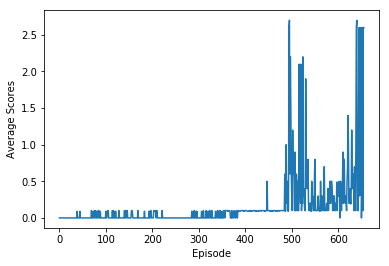

In [20]:
x = np.linspace(0,len(scores)-1,len(scores))
plt.plot(x, scores)
plt.xlabel('Episode')
plt.ylabel('Average Scores')

In [25]:

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth', map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

while True:
    actions = agent.act(states)                        # select actions from loaded model agent
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
        
print('Score: {}'.format(np.max(scores)))

Score: 0.800000011920929


In [27]:
env.close()